# Predicting Wine Quality using Regularization

A project for my Codecademy Certified Data Scientist: Machine Learning Specialist course. 

Data from the UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/186/wine+quality). 

Robert Hall

12/24/2024

## 1. Data Preparation and Transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_quality.csv')
print(df.columns)
y = df['quality']
features = df.drop(columns = ['quality'])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [3]:
## 1. Data transformation
from sklearn.preprocessing import StandardScaler
standard_scaler_fit = StandardScaler().fit(features)
X = standard_scaler_fit.transform(features)

## 2. Split Data into Train and Test Data

In [4]:
## 2. Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=99)

## 3. Build and Fit Logistic Regression Model Without Regularization

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression
clf_no_reg = LogisticRegression(penalty='none')
clf_no_reg.fit(x_train, y_train)

LogisticRegression(penalty='none')

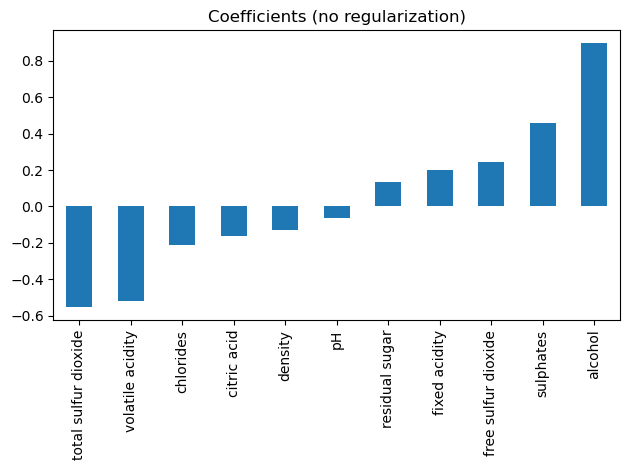

<Figure size 640x480 with 0 Axes>

In [8]:
## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

In [10]:
## 5. Evaluate training and test performance
from sklearn.metrics import f1_score
y_pred_test = clf_no_reg.predict(x_test)
y_pred_train = clf_no_reg.predict(x_train)
print(f"Training Score:     {f1_score(y_train, y_pred_train)}")
print(f"Test Score:         {f1_score(y_test, y_pred_test)}")

Training Score:     0.7727598566308242
Test Score:         0.7266666666666667


## 4. Build and Fit Logistic Regression Model With L2 Regularization

In [11]:
## 6. Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(x_train, y_train)

LogisticRegression()

In [12]:
## 7. Get Ridge Scores
y_pred_test_def = clf_default.predict(x_test)
y_pred_train_def = clf_default.predict(x_train)
print(f"Training Score Default:     {f1_score(y_train, y_pred_train_def)}")
print(f"Test Score Default:         {f1_score(y_test, y_pred_test_def)}")

Training Score Default:     0.7727598566308242
Test Score Default:         0.7266666666666667


In [13]:
## 8. Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
for c in C_array:
  clf = LogisticRegression(C = c)
  clf.fit(x_train, y_train)
  y_pred_test = clf.predict(x_test)
  y_pred_train = clf.predict(x_train)
  training_array.append(f1_score(y_train, y_pred_train))
  test_array.append(f1_score(y_test, y_pred_test))

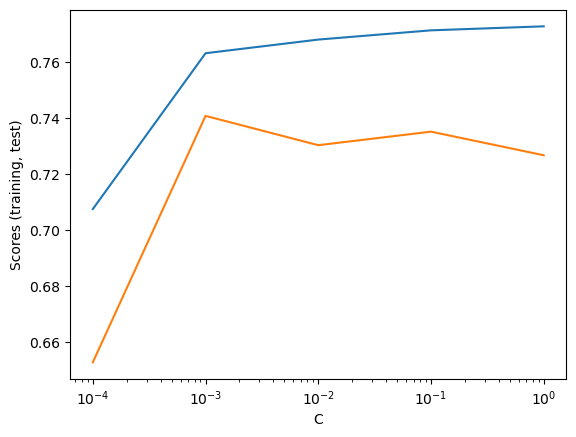

<Figure size 640x480 with 0 Axes>

In [17]:
## 9. Plot training and test scores as a function of C
plt.plot(C_array, training_array)
plt.plot(C_array, test_array)
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Scores (training, test)")
plt.show()
plt.clf()

## 5. Tune Hyperparameters for L2 Regularization

In [18]:
## 10. Making a parameter grid for GridSearchCV
C_arr = np.logspace(-4, -2, 100)
tuning_c = {"C": C_arr}

In [21]:
## 11. Implementing GridSearchCV with l2 penalty

from sklearn.model_selection import GridSearchCV
clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, param_grid=tuning_c, scoring='f1', cv=5)
gs.fit(x_train, y_train)

## 12. Optimal C value and the score corresponding to it
print(f"Optimal C Hyperparameter:               {gs.best_params_['C']}")
print(f"Best Score:                             {gs.best_score_}")

## 13. Validating the "best classifier"
clf_best = LogisticRegression(C = gs.best_params_['C'])
clf_best.fit(x_train, y_train)
y_pred_best = clf_best.predict(x_test)
print(f"F1 Score at Optimal C Hyperparameter:   {f1_score(y_test, y_pred_best)}")

Optimal C Hyperparameter:               0.0019630406500402726
Best Score:                             0.7723336222647887
F1 Score at Optimal C Hyperparameter:   0.7407407407407408


In [22]:
## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
C_array = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(Cs=C_array, cv = 5, penalty = 'l1', scoring = 'f1', solver = 'liblinear')
clf_l1.fit(X,y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

In [24]:
## 15. Optimal C value and corresponding coefficients
print(f"Best C Value: {clf_l1.C_[0]}")
print(f"Best-Fit Coefficients: {clf_l1.coef_}")

Best C Value: 0.25950242113997374
Best-Fit Coefficients: [[ 0.11629509 -0.55627387 -0.17254056  0.03123686 -0.17332928  0.20059875
  -0.50592737  0.         -0.07052297  0.43224548  0.94100828]]


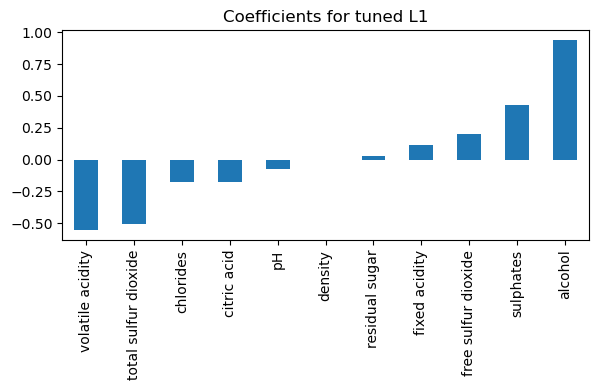

<Figure size 640x480 with 0 Axes>

In [28]:
## 16. Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()

plt.figure(figsize = (6,4))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()
